# Importando datos y librerías

In [78]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/laboral/proyectos/covid19Col/')

import pandas as pd
from numpy import array, arange
from pylab import plot, show, grid, xticks, xlim, rcParams, legend, xlabel, ylabel, text

filePath = "gdrive/My Drive/laboral/proyectos/covid19Col/Casos1_12abr2020.csv"
data = pd.read_csv(filePath)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Leyendo datos (Abril 08 de 2020)

In [4]:
data.head()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


# Análisis de infectados por edad y sexo

In [0]:
fechaEdadSexo = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Sexo','Edad'])

## Porcentaje por sexo

In [6]:
histo = fechaEdadSexo.groupby('Edad')['Sexo'].sum()

male = histo.str.count('M')
female = histo.str.count('F')
total = male.sum()+female.sum()

print("Total infectados:", total)
print("Hombres infectados:",male.sum(), round((male.sum()/total)*100,2), "%")
print("Mujeres infectados:",female.sum(), round((female.sum()/total)*100,2), "%")

Total infectados: 2709
Hombres infectados: 1365 50.39 %
Mujeres infectados: 1344 49.61 %


## Distribución de infectados por edad y sexo

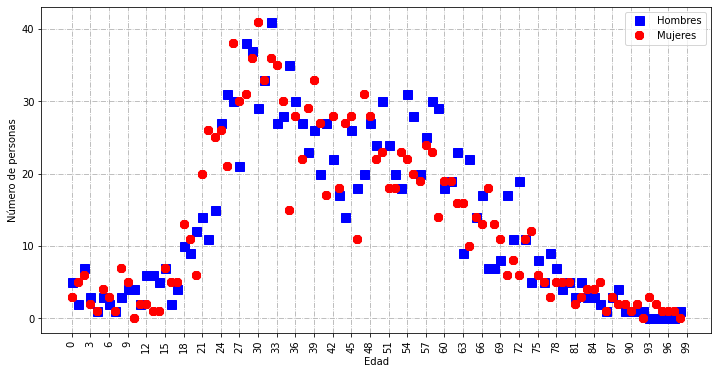

In [7]:
rcParams['figure.figsize'] = 12, 6

plot(histo.str.count('M'),'bs', markersize=9, label='Hombres')
plot(histo.str.count('F'),'r8', markersize=8, label='Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid(ls='-.')
#xlim(0,10)
xlabel('Edad')
ylabel('Número de personas')
legend()
show()

## Media y desviación estándar de infectados por edad y sexo

In [8]:
meanSex = fechaEdadSexo.groupby('Sexo').mean()
stdSex = fechaEdadSexo.groupby('Sexo').std()

print( "Promedio Mujeres:", round(meanSex.iloc[0][0], 2) )
print( "Promedio Hombres:", round(meanSex.iloc[1][0], 2) )
print()

print("-------")
print()
print( "Desv. Estand. Mujeres:", round(stdSex.iloc[0][0], 2) )
print( "Desv. Estand. Hombres:", round(stdSex.iloc[1][0], 2) )

Promedio Mujeres: 42.88
Promedio Hombres: 43.84

-------

Desv. Estand. Mujeres: 18.11
Desv. Estand. Hombres: 17.95


# Análisis de fallecidos por edad y sexo

In [0]:
fallEdadSexo = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Atención**','Sexo','Edad'])

## Porcentaje de fallecidos por sexo

In [14]:
histo = fallEdadSexo.groupby('Atención**')['Sexo'].sum()

fllMuj = histo.loc['Fallecido'].count('F')
fllHom = histo.loc['Fallecido'].count('M')
fllTot = fllMuj + fllHom

print("Total fallecidos:", fllTot)
print("Hombres infectados:", fllHom, ";", round((fllHom/fllTot)*100,2), "%")
print("Mujeres infectados:", fllMuj, ";", round((fllMuj/fllTot)*100,2), "%")

Total fallecidos: 100
Hombres infectados: 63 ; 63.0 %
Mujeres infectados: 37 ; 37.0 %


## Distribución de fallecidos por edad y sexo

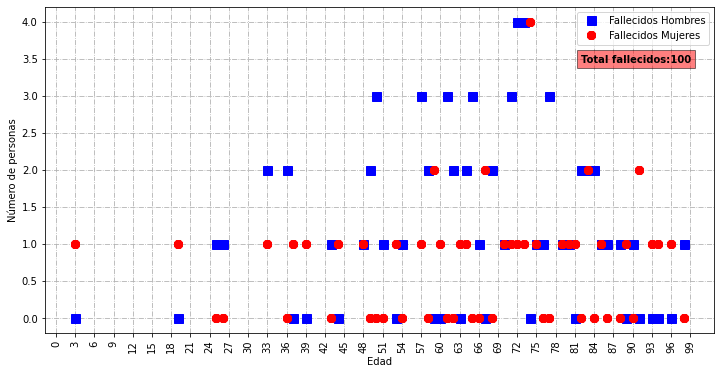

In [107]:
histo = fallEdadSexo.groupby(['Atención**','Edad'])['Sexo'].sum()
rcParams['figure.figsize'] = 12, 6

plot(histo['Fallecido'].str.count('M'),'bs', markersize=9, label='Fallecidos Hombres')
plot(histo['Fallecido'].str.count('F'),'r8', markersize=8, label='Fallecidos Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid(ls='-.')
#xlim(0,10)
xlabel('Edad')
ylabel('Número de personas')
legend()
tfll = "Total fallecidos:" + str(fllTot)
text(82,3.45, tfll, fontsize=10, weight='bold', bbox=dict(facecolor='red', alpha=0.5))
show()

## Media y desviación estándar de fallecidos por edad y sexo

In [109]:
#meanSex = fechaEdadSexo.groupby('Sexo').mean()

meanSex = fallEdadSexo[fallEdadSexo['Atención**'] == 'Fallecido'].groupby('Sexo').mean()
stdSex = fallEdadSexo[fallEdadSexo['Atención**'] == 'Fallecido'].groupby('Sexo').std()

print( "Promedio Mujeres fallecidas:", round(meanSex.iloc[0][0], 2) )
print( "Promedio Hombres fallecidos:", round(meanSex.iloc[1][0], 2) )
print()

print("-------")
print()
print( "Desv. Estand. Mujeres:", round(stdSex.iloc[0][0], 2) )
print( "Desv. Estand. Hombres:", round(stdSex.iloc[1][0], 2) )

Promedio Mujeres fallecidas: 66.86
Promedio Hombres fallecidos: 65.1

-------

Desv. Estand. Mujeres: 21.21
Desv. Estand. Hombres: 16.16
